In [25]:
#Importar bibliotecas que vamos utilizar
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix




In [3]:
#Ler o arquivo CSV
df = pd.read_csv('dados_produtos.csv')

In [4]:
#informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [5]:
#Analise descritiva do dataframe
df.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


Text(0.5, 0, 'Produtos')

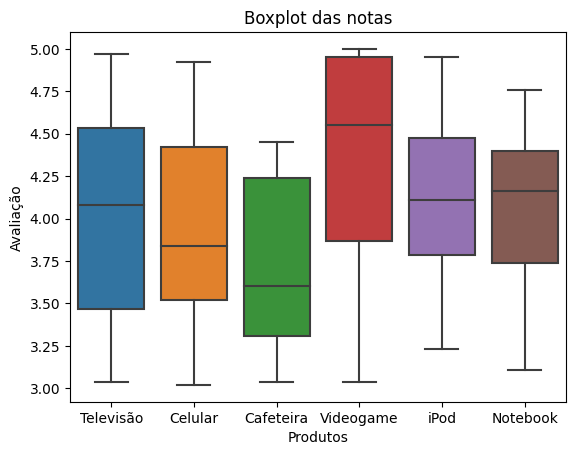

In [6]:
#Plotar BOXPLOT
sns.boxplot(x = df['product_name'], y = df['rating'])
plt.title('Boxplot das notas')
plt.ylabel('Avaliação')
plt.xlabel('Produtos')

In [7]:
#Dados treinamento
produtos = np.array([df['product_name']])
avaliacao = np.array([df['rating']])
print(produtos)
print(avaliacao)

[['Televisão' 'Celular' 'Cafeteira' 'Televisão' 'Videogame' 'Celular'
  'iPod' 'Notebook' 'Videogame' 'Televisão' 'Celular' 'Televisão'
  'Notebook' 'Televisão' 'Celular' 'iPod' 'Notebook' 'Notebook'
  'Notebook' 'Notebook' 'Televisão' 'iPod' 'iPod' 'Cafeteira' 'Celular'
  'Celular' 'Celular' 'iPod' 'Videogame' 'iPod' 'Celular' 'Televisão'
  'iPod' 'Cafeteira' 'Televisão' 'Celular' 'Cafeteira' 'Cafeteira'
  'Televisão' 'Celular' 'iPod' 'Videogame' 'Televisão' 'Celular'
  'Televisão' 'Videogame' 'Televisão' 'Notebook' 'Videogame' 'Notebook'
  'Videogame' 'Videogame' 'iPod' 'Cafeteira' 'Televisão' 'Videogame'
  'Celular' 'iPod' 'Celular' 'Videogame' 'iPod' 'Televisão' 'Cafeteira'
  'Notebook' 'Notebook' 'Televisão' 'Videogame' 'Celular' 'Televisão'
  'iPod' 'Televisão' 'Videogame' 'Celular' 'Videogame' 'Cafeteira' 'iPod'
  'Videogame' 'Celular' 'Televisão' 'Celular' 'Celular' 'Notebook' 'iPod'
  'Celular' 'Cafeteira' 'Notebook' 'iPod' 'Notebook' 'Videogame'
  'Celular' 'Videogame' 'iPod'

In [8]:
#verifica se existe valor vazio
df.isnull().sum() 

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [15]:
#seleciona apenas os valores numéricos do conjunto de dados
col_n = df.select_dtypes(include=['number']) 

In [16]:
#celula correlção de variaveis
correlacao = col_n.corr()
correlacao

,rating,rating_count,purchased
rating,1.000000,0.051993,0.032637
rating_count,0.051993,1.000000,0.129694
purchased,0.032637,0.129694,1.000000


<Axes: >

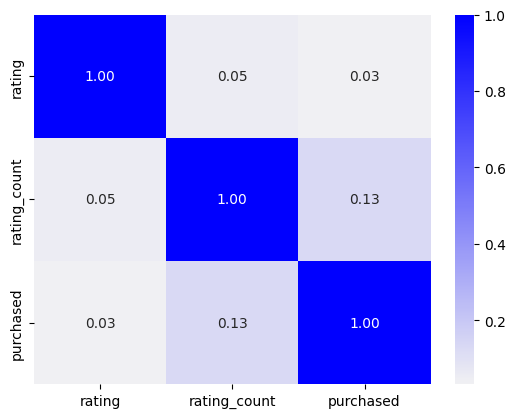

In [17]:
#Map de color da correlção
color = sns.color_palette('light:blue', as_cmap = True)
sns.heatmap(correlacao, cmap = color, fmt='.2f', annot=True)

In [9]:
#Dividir dados em teste e treino
produtos_treino, produtos_teste, avaliacao_treino, avaliacao_teste = train_test_split(produtos.reshape(-1,1),
avaliacao.reshape(-1,1), test_size=0.2, random_state=42)


In [10]:
#
modelo = DecisionTreeClassifier()
modelo.fit(avaliacao_treino, produtos_treino)

DecisionTreeClassifier()


------------------------------------------------------------------------- Arvore de Decisao do produto Televisão ----------------------------------------------------------------------------

Avaliacao do modelo: 

Accuracy score: 0.5
F1 Score: 0.5
Precision Score: 1.0
Recall Score: 0.3333333333333333
Confusion Matrix: [[1 0]
 [2 1]]

Visualização da Árvore: 

------------------------------------------------------------------------- Arvore de Decisao do produto Celular ----------------------------------------------------------------------------

Avaliacao do modelo: 

Accuracy score: 0.6
F1 Score: 0.6666666666666666
Precision Score: 0.5
Recall Score: 1.0
Confusion Matrix: [[1 2]
 [0 2]]

Visualização da Árvore: 

------------------------------------------------------------------------- Arvore de Decisao do produto Cafeteira ----------------------------------------------------------------------------

Avaliacao do modelo: 

Accuracy score: 0.5
F1 Score: 0.0
Precision Score: 0.0
Recall S

C:\Users\dsadm\AppData\Local\Temp\ipykernel_28456\1476034014.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
C:\Users\dsadm\AppData\Local\Temp\ipykernel_28456\1476034014.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classi

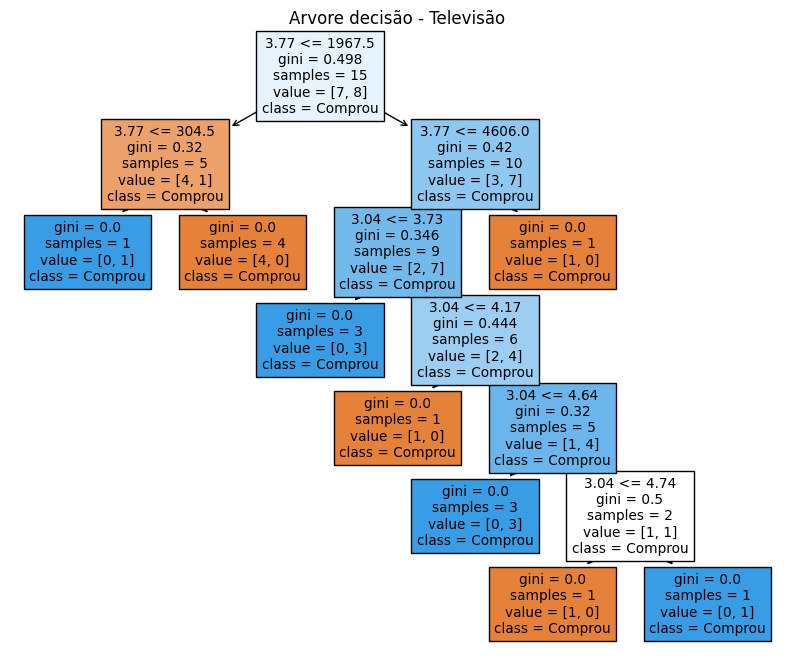

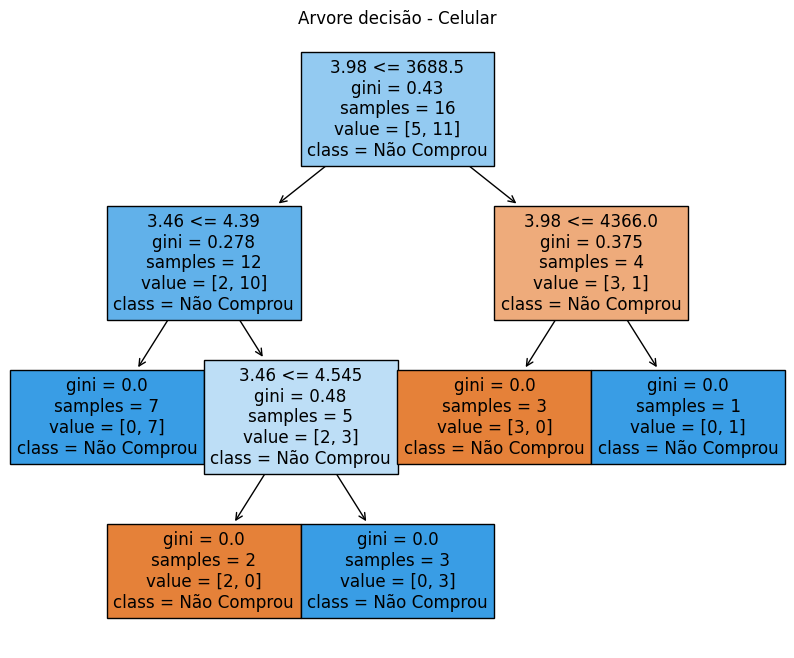

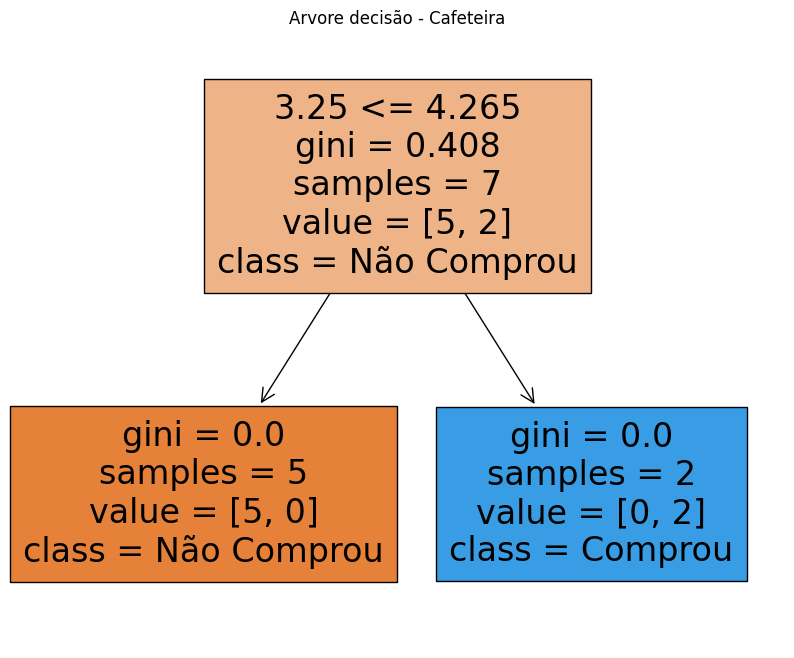

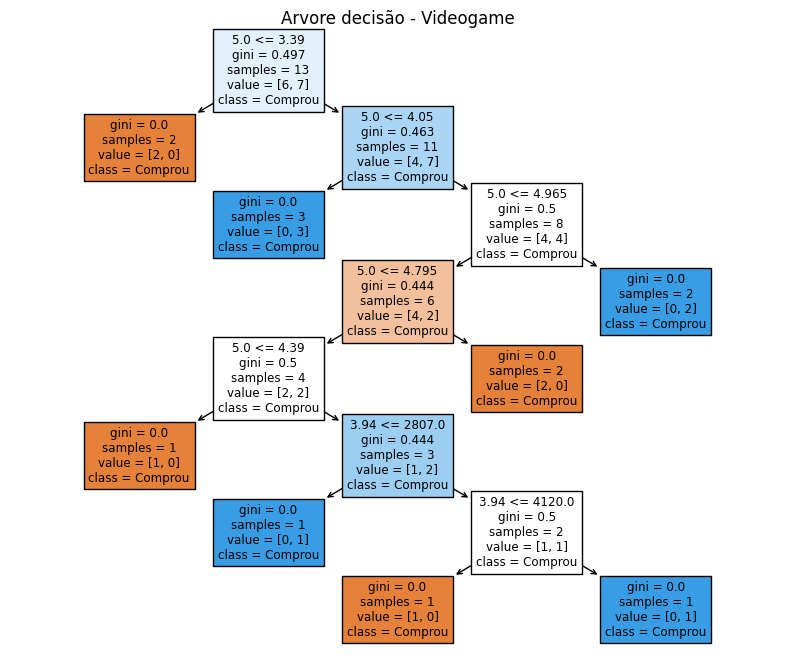

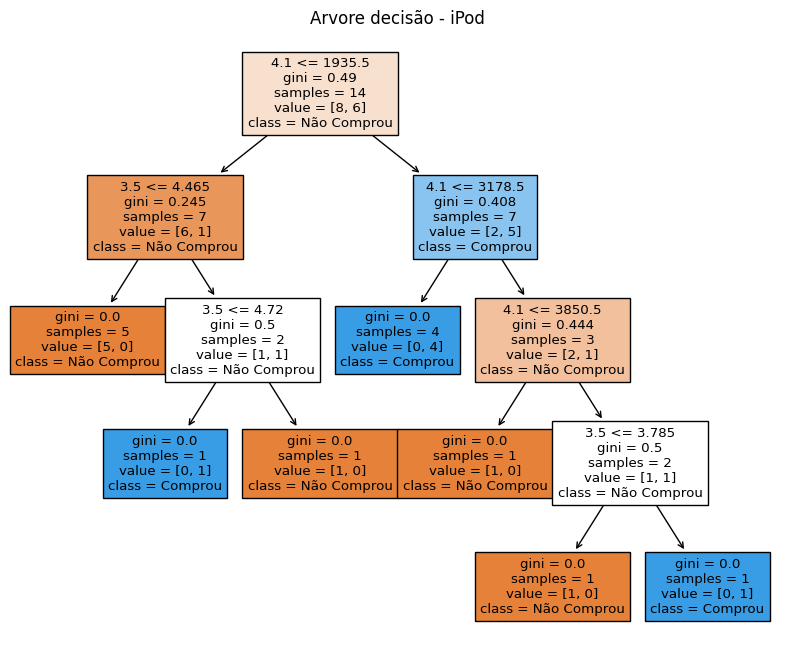

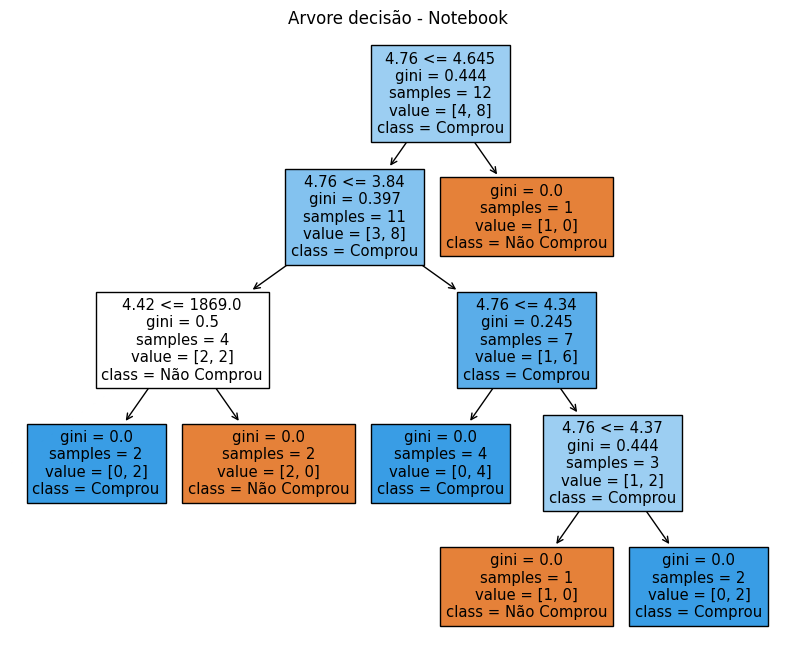

In [27]:
products = df['product_name'].unique()

for product in products:
    print(f'\n------------------------------------------------------------------------- Arvore de Decisao do produto {product} ----------------------------------------------------------------------------\n')

    product_df = df.loc[df['product_name'] == product]

    X = product_df.drop(['purchased', 'product_name'], axis=1)
    y = product_df['purchased']

    X_train, X_teste, y_train, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

    dtc = DecisionTreeClassifier()
    model = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_teste)

    print('Avaliacao do modelo: \n')
    print(f'Accuracy score: {accuracy_score(y_teste, y_pred)}')
    print(f'F1 Score: {f1_score(y_teste, y_pred)}')
    print(f'Precision Score: {precision_score(y_teste, y_pred)}')
    print(f'Recall Score: {recall_score(y_teste, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_teste, y_pred)}')

    print('\nVisualização da Árvore: ')

    product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])

    fig = plt.figure(figsize=(10, 8))

    tree.plot_tree(model, feature_names = product_df['rating'].tolist(), class_names = product_df['purchased'].tolist(), filled= True)
    plt.title(f'Arvore decisão - {product}')

In [24]:
products

array(['Televisão', 'Celular', 'Cafeteira', 'Videogame', 'iPod',
       'Notebook'], dtype=object)